In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib widget
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.io as pio
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pio.renderers.default='notebook'


### Read data and compute width and ISI_pc_in_band_60Hz

In [2]:
path = '/home/lorenzo/Principal/Noise-Neuron discriminator/Datos/'
data = pd.read_pickle(path + 'PCCIBNMZc')
data = data.drop(columns = ['Bulk'])
df = data.copy()
df = df.drop(df.index[df.bNoise.isna()])
df.bNoise = df.bNoise.astype(int)

In [3]:
def Isi_pc(Isi_example,i):
    suma = np.sum(Isi_example)
    if suma == 0: return 0
    else:
        return np.sum(Isi_example[:i])/suma

def width(x):
    x = x-x[0]
    amplitude = x[19]
    half_ammplitude = amplitude/2
    min_left = np.argsort(np.abs(x[:19]-half_ammplitude))[0]
    min_right = np.argsort(np.abs(x[19:]-half_ammplitude))[0] + 19
    return np.abs(min_left - min_right)+1

df['width'] = df.Mean.apply(width)
i = 5
df['ISI_in_band_'+str((i+1)*10)+'Hz'] = data.ISI.apply(Isi_pc,args = (i,))

# K means

### Caso simple

In [88]:
X = df[['ISI_in_band_60Hz','width','ZeroCrossings']]
y = df.bNoise

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Train

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

xs = X_train[:,0]
ys = X_train[:,1]
zs = X_train[:,2]
label = y_train
predict = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_
confusion_matrix(y_test,predict,labels=[0, 1,2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, c = label)

NameError: name 'X_train' is not defined

#### Test

<IPython.core.display.Javascript object>


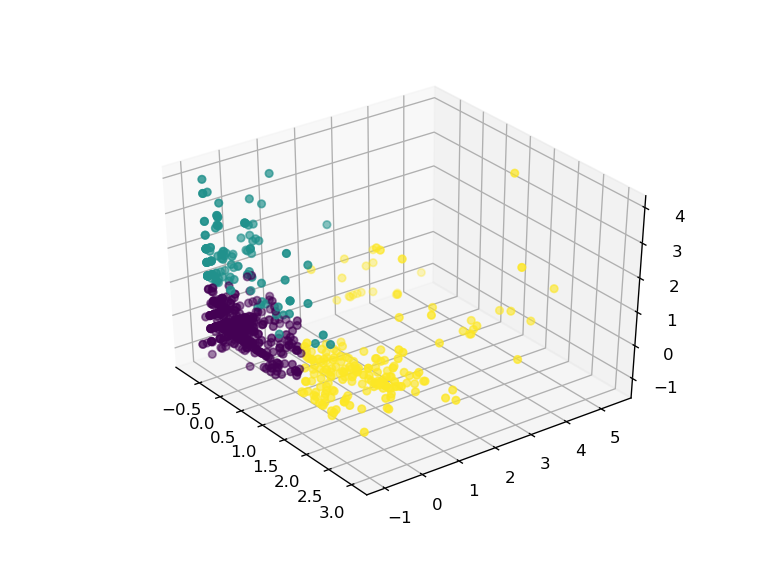

In [134]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

predict = kmeans.predict(X_test)

xs = X_test[:,0]
ys = X_test[:,1]
zs = X_test[:,2]

label = predict

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, c = label)

## Estadistica con varios n

In [151]:
log = {0:[],1:[],2:[]}
for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    counts = pd.DataFrame({'a':y_test})
    counts = counts.a.value_counts().values #counts[0] = len(y_train.bNoise == 1)
    
    Neurons_as_noise_list = []
    Noise_as_neurons_list = []
    Noise_found_list = []   
    for i in range(2,10):
        classifier = kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
        classifier.fit(X_train, y_train)
    
        
        y_pred = classifier.predict(X_test)
        conf_m = confusion_matrix(y_test, y_pred)
        Neuron_as_noise = conf_m[0][1]+ conf_m[2][1]
        Noise_as_neurons = conf_m[1][0] + conf_m[1][2]
        Noise_found = conf_m[1][1]
        Neurons_as_noise_list.append(Neuron_as_noise/(counts[1] + counts[2]))
        Noise_as_neurons_list.append(Noise_as_neurons/np.sum(counts[0]))
        Noise_found_list.append(Noise_found/np.sum(counts[0]))
                                     
    log[0].append(Neurons_as_noise_list)
    log[1].append(Noise_as_neurons_list)
    log[2].append(Noise_found_list)



In [159]:
Neurons_as_noise_mean = np.mean(log[0],axis = 0)
Neurons_as_noise_std = np.std(log[0],axis = 0)

Noise_as_neurons_mean = np.mean(log[1],axis = 0)
Noise_as_neurons_std = np.std(log[1],axis = 0)

Noise_found_mean = np.mean(log[2],axis = 0)
Noise_found_std = np.std(log[2],axis = 0)

<IPython.core.display.Javascript object>


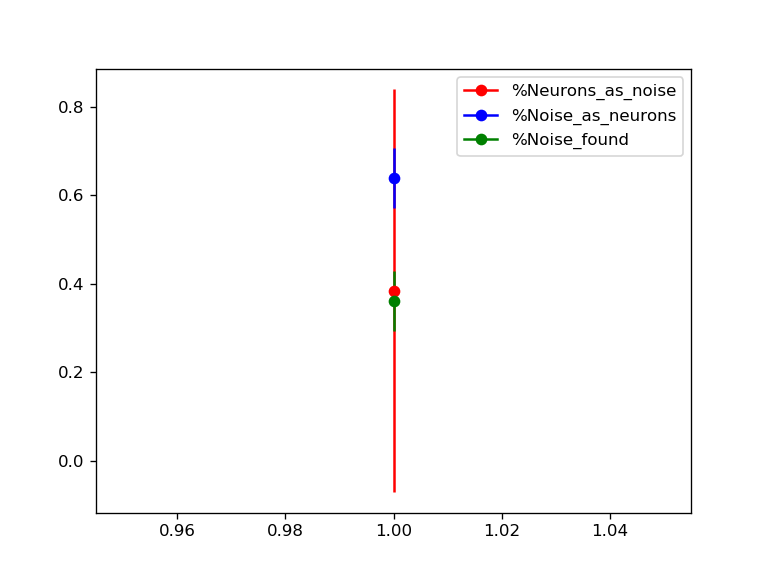

In [161]:
fig = plt.figure()
ax = fig.subplots(1)
ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Neurons_as_noise_mean,'o-',c = 'red',label = '%Neurons_as_noise')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Neurons_as_noise_mean, yerr = Neurons_as_noise_std,color = 'red')

ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Noise_as_neurons_mean,'o-',c = 'blue',label = '%Noise_as_neurons')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Noise_as_neurons_mean, yerr = Noise_as_neurons_std,color = 'blue')

ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Noise_found_mean,'o-',c = 'green',label = '%Noise_found')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Noise_found_mean, yerr = Noise_found_std,color = 'green')

ax.legend()

<IPython.core.display.Javascript object>


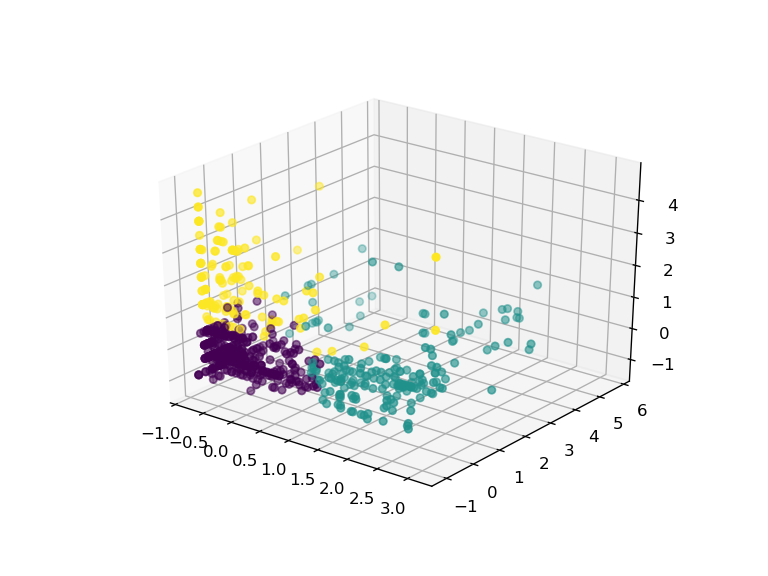

In [128]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

predict = kmeans.predict(X_test)

xs = X_test[:,0]
ys = X_test[:,1]
zs = X_test[:,2]

label = predict

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, c = label)

In [4]:
data_exp = df[['ISI_in_band_60Hz','ZeroCrossings','width','bNoise']]



xs = data_exp.ISI_in_band_60Hz.values
ys = data_exp.ZeroCrossings.values
zs = data_exp.width.values
color = data_exp.bNoise.values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('%ISI_in_band_60HZ')
ax.set_ylabel('ZeroCrossings')
ax.set_zlabel('Width')

sc = ax.scatter(xs, ys, zs, c = color)

size = 81
lp = lambda i: plt.plot([],[],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",label="bNoise = {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data_exp["bNoise"])]
plt.legend(handles=handles)
ax.legend()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Nearest_Neighbours

## Caso Simple

In [6]:
X = df[['ISI_in_band_60Hz','width','ZeroCrossings']]
y = df.bNoise

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train and Test

<IPython.core.display.Javascript object>


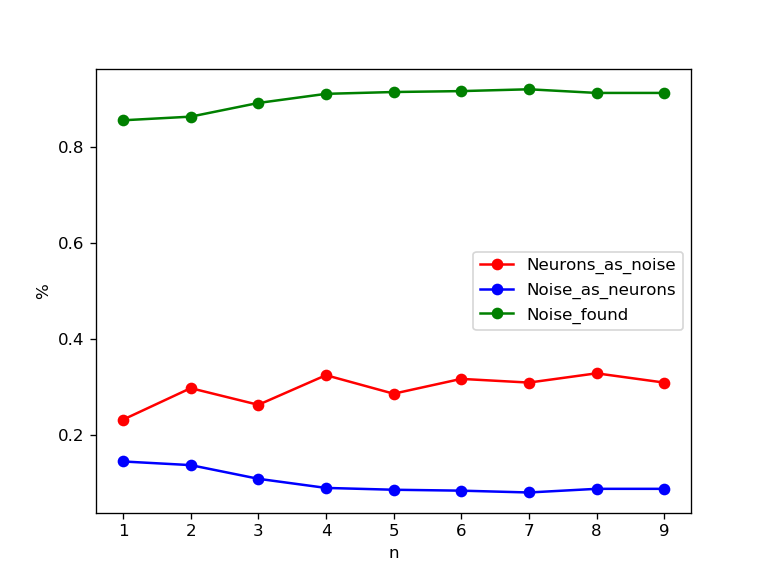

Text(0.5, 0, 'n')

In [78]:
Neurons_as_noise_list = []
Noise_as_neurons_list = []
Noise_found_list = []
for i in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    conf_m = confusion_matrix(y_test, y_pred)
    Neuron_as_noise = conf_m[0][1]+ conf_m[2][1]
    Noise_as_neurons = conf_m[1][0] + conf_m[1][2]
    Noise_found = conf_m[1][1]
    Neurons_as_noise_list.append(Neuron_as_noise)
    Noise_as_neurons_list.append(Noise_as_neurons)
    Noise_found_list.append(Noise_found)

    
fig = plt.figure()
plt.plot(np.arange(1,len(Neurons_as_noise_list)+1),np.array(Neurons_as_noise_list)/(np.sum(conf_m[0])+np.sum(conf_m[2])),
         'o-',c = 'red',label = 'Neurons_as_noise')

plt.plot(np.arange(1,len(Noise_as_neurons_list)+1),np.array(Noise_as_neurons_list)/(np.sum(conf_m[1])),'o-',c = 'blue',
        label = 'Noise_as_neurons')

plt.plot(np.arange(1,len(Noise_found_list)+1),np.array(Noise_found_list)/(np.sum(conf_m[1])),'o-',c = 'green',
        label = 'Noise_found')

counts = pd.DataFrame({'a':y_test})
counts = counts.a.value_counts().values

plt.legend()
plt.ylabel('%')
plt.xlabel('n')

 

In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 94  40  18]
 [ 31 480  15]
 [ 38  40  29]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       152
           1       0.86      0.91      0.88       526
           2       0.47      0.27      0.34       107

    accuracy                           0.77       785
   macro avg       0.63      0.60      0.61       785
weighted avg       0.75      0.77      0.75       785



### Estadistica

In [75]:
log = {0:[],1:[],2:[]}
for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    counts = pd.DataFrame({'a':y_test})
    counts = counts.a.value_counts().values #counts[0] = len(y_train.bNoise == 1)
    
    Neurons_as_noise_list = []
    Noise_as_neurons_list = []
    Noise_found_list = []   
    for i in range(1,10):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
    
        
        y_pred = classifier.predict(X_test)
        conf_m = confusion_matrix(y_test, y_pred)
        Neuron_as_noise = conf_m[0][1]+ conf_m[2][1]
        Noise_as_neurons = conf_m[1][0] + conf_m[1][2]
        Noise_found = conf_m[1][1]
        Neurons_as_noise_list.append(Neuron_as_noise/(counts[1] + counts[2]))
        Noise_as_neurons_list.append(Noise_as_neurons/np.sum(counts[0]))
        Noise_found_list.append(Noise_found/np.sum(counts[0]))
                                     
    log[0].append(Neurons_as_noise_list)
    log[1].append(Noise_as_neurons_list)
    log[2].append(Noise_found_list)



In [76]:
Neurons_as_noise_mean = np.mean(log[0],axis = 0)
Neurons_as_noise_std = np.std(log[0],axis = 0)

Noise_as_neurons_mean = np.mean(log[1],axis = 0)
Noise_as_neurons_std = np.std(log[1],axis = 0)

Noise_found_mean = np.mean(log[2],axis = 0)
Noise_found_std = np.std(log[2],axis = 0)

<IPython.core.display.Javascript object>


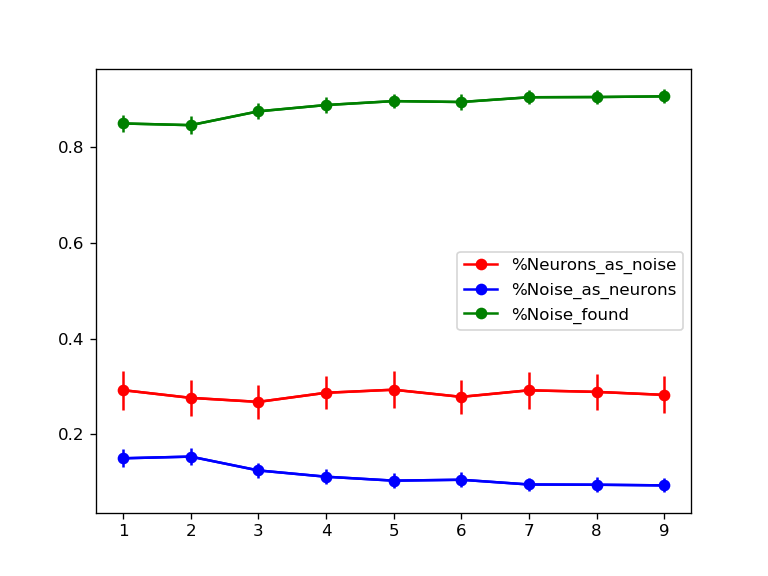

In [77]:
fig = plt.figure()
ax = fig.subplots(1)
ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Neurons_as_noise_mean,'o-',c = 'red',label = '%Neurons_as_noise')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Neurons_as_noise_mean, yerr = Neurons_as_noise_std,color = 'red')

ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Noise_as_neurons_mean,'o-',c = 'blue',label = '%Noise_as_neurons')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Noise_as_neurons_mean, yerr = Noise_as_neurons_std,color = 'blue')

ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Noise_found_mean,'o-',c = 'green',label = '%Noise_found')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Noise_found_mean, yerr = Noise_found_std,color = 'green')

ax.legend()

In [157]:
np.arange(3,len(Neurons_as_noise_mean)+3)

array([3])

In [156]:
len(Neurons_as_noise_mean)

1